# Tracking lunar motion

The reference equation:

![radial equation of the motion](eq.png)

where:

- $a'=149 598 261$ km

- $n~′ = 0.98560025^{\circ}$

- $a = 384399$ km

- $n = 13.17639646^\circ$ 

- $e ′ = 0.016711$

- $e = 0.05488$

- $ι = 5.161^\circ$

- $m = n ′ /n = 0.07480$

- $T = n t$

- $c \simeq  -3/4 -225/32*m + \mathcal{O}(m^2)$.


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#params
n_star = 0.98560025*math.pi/180
a = 384399*1000
alpha_0 = 0
n = 13.17639646*math.pi/180 #2*pi:360=x*n
e = 0.05488
m = n_star /n 
c = -3/4-224/32*m


In [2]:
from math import cos

#the orbital fucntion
def r_of_t(t, n = n, alpha_0 = 0, km = False):
    T = n*t
    #T=t
    if km:
        return  (a*(1-e*cos((1+c*m**2)*T- alpha_0)+ 0.5* e**2 -1/6*m**2 -1/2*e**2*cos(2*(1+c*m**2)*T -2*alpha_0) -m**2*cos(2*(1-m)*T)-15/8*m*e*cos((1-2*m-c*m**2)*T+alpha_0)))/1000.
    return  (1-e*cos((1+c*m**2)*T- alpha_0)+ 0.5* e**2 -1/6*m**2 -1/2*e**2*cos(2*(1+c*m**2)*T -2*alpha_0) -m**2*cos(2*(1-m)*T)-15/8*m*e*cos((1-2*m-c*m**2)*T+alpha_0))

In [3]:
np.arange(0, 700, 10)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510,
       520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640,
       650, 660, 670, 680, 690])

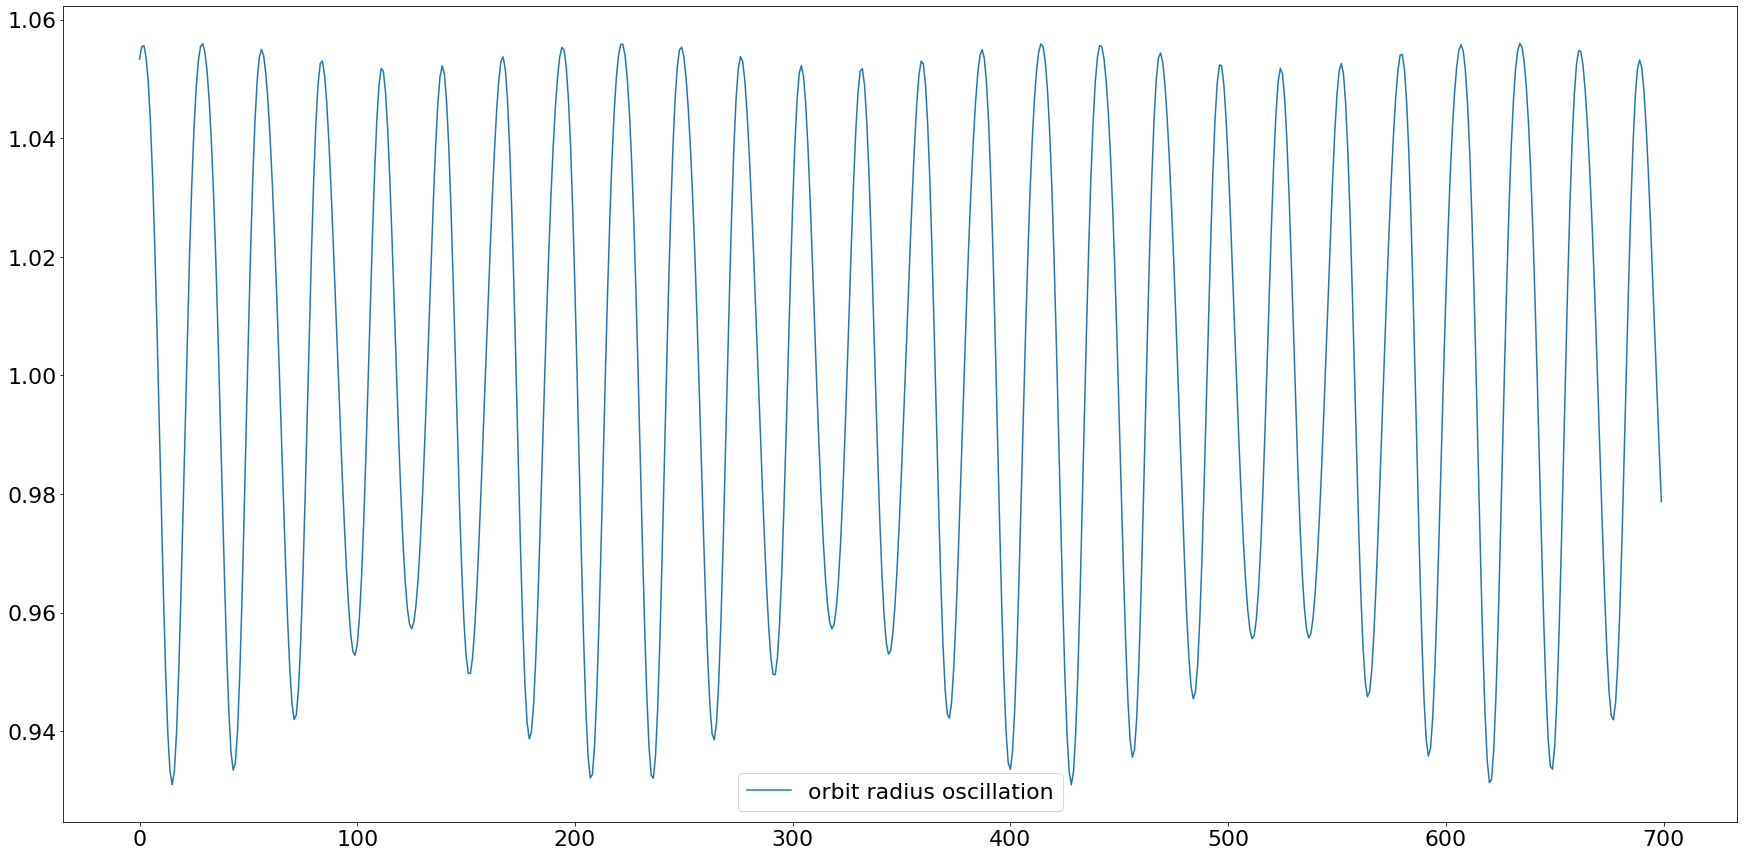

In [4]:
matplotlib.rcParams.update({'font.size': 22})

plot_every_min = False
if plot_every_min:
    rrange = 24*60 #every minute for 1 days
    scale_factor = 60
else: #plot_every_hour
    rrange = 700 #every hour for 10 days
    scale_factor = 1 #60*60*24

plt.subplots(figsize=(30, 15))
pts=[]
times = np.arange(0, rrange, 1)
for t in times:
    pts.append(r_of_t(t*scale_factor, alpha_0 = 60, km = False))
plt.plot(pts, label= "orbit radius oscillation")
#plt.hlines(a/1000,xmin=0, xmax=24, label="mean distance (~384e3 km)")
#plt.xscale()
#plt.xlim((0,700))
plt.legend()
plt.show()

#pts

The <a href="https://rhodesmill.org/pyephem/index.html">PyEphem</a> astronomy library has helped generations of Python programmers locate the stars, planets, and Earth satellites.

In [5]:
import ephem

In [6]:
moon = ephem.Moon()

venice = ephem.Observer()

In [7]:
venice.lat = '45.44'
venice.lon = '12.33'

In [10]:
# init venice-moon distance at datetime.now

moon_dists = []
start_date = dt.datetime.timestamp(dt.datetime.now())

venice.date = dt.datetime.fromtimestamp(start_date).strftime('%Y/%m/%d %H:%M:%S')
moon.compute(venice)
moon_dists.append(moon.earth_distance)

In [11]:
moon_dists

[0.0024684814270585775]

In [12]:
# predict the venice-moon distance for n future hours

for i in range(24*365):
    start_date += 3600
    venice.date = dt.datetime.fromtimestamp(start_date).strftime('%Y/%m/%d %H:%M:%S')
    moon.compute(venice)
    moon_dists.append(moon.earth_distance)

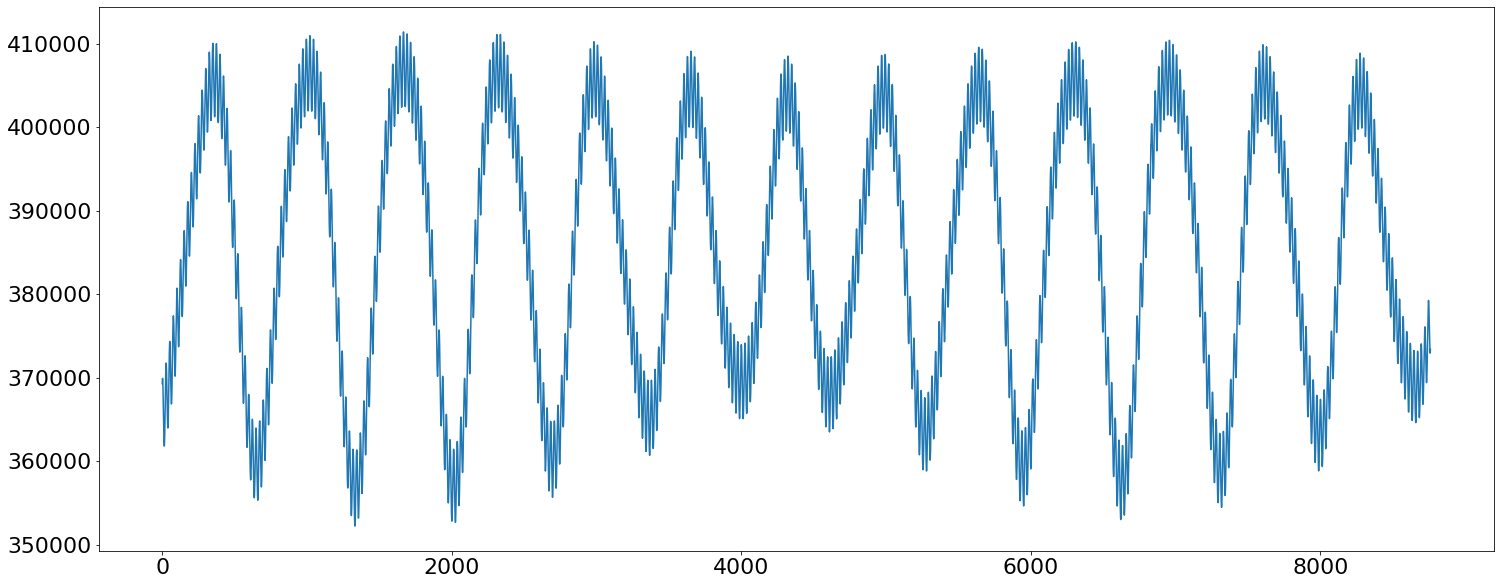

In [13]:
# plot it
plt.figure(figsize = (25, 10))
plt.plot(np.array(moon_dists)*1.496e8)

In [14]:
def moon_distance(startDate, endDate, km = False, plot = True):
    
    '''
    startDate = %Y/%m/%d %H:%M:%S
    endDate = %Y/%m/%d %H:%M:%S
    
    if km = False output will be in AU == 1.496e8 * Km
    if plot = False only list is returned
    
    return np.array obj
    '''
    
    AU = 1.496e8
    moon = ephem.Moon()
    venice = ephem.Observer()
    venice.lat = '45.44'
    venice.lon = '12.33'
    moon_dists = []
    dates = []
    
    start_date = dt.datetime.timestamp(dt.datetime.strptime(startDate, "%Y/%m/%d %H:%M:%S"))
    end_date = dt.datetime.timestamp(dt.datetime.strptime(endDate, "%Y/%m/%d %H:%M:%S"))
     
    curr_date = dt.datetime.fromtimestamp(start_date).strftime('%Y/%m/%d %H:%M:%S')
    venice.date = curr_date
    moon.compute(venice)
    moon_dists.append(moon.earth_distance)
    
    if plot:
        dates.append(curr_date)
    
    while start_date < end_date:
        start_date += 3600 
        curr_date = dt.datetime.fromtimestamp(start_date).strftime('%Y/%m/%d %H:%M:%S')
        venice.date = curr_date
        moon.compute(venice)
        moon_dists.append(moon.earth_distance)
        
        if plot:
            dates.append(curr_date)

    
    moon_dists = np.array(moon_dists)
    
    if km:
        moon_dists = moon_dists * AU
    
    if plot:
        plt.figure(figsize = (25, 10))
        plt.plot(moon_dists)
        plt.show()
        
    return moon_dists, dates

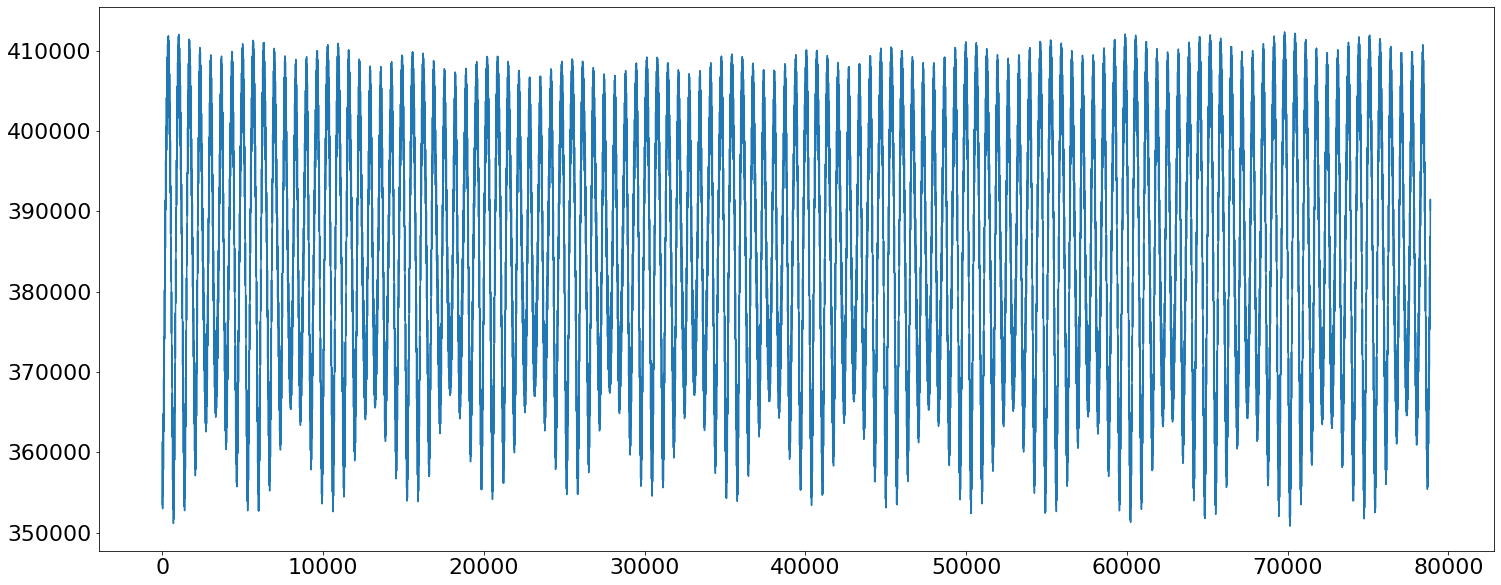

In [15]:
dists, dates = moon_distance(startDate = "2010/01/01 00:00:00", endDate = "2018/12/31 23:00:00", km = True, plot = True)

In [21]:
import pandas as pd

In [31]:
final = pd.DataFrame(data = {'datetime':dates, 'dists(Km)':dists})
final.head()

,datetime,dists(Km)
0,2010/01/01 00:00:00,353510.208614
1,2010/01/01 01:00:00,353731.458075
2,2010/01/01 02:00:00,354197.433405
3,2010/01/01 03:00:00,354875.253700
4,2010/01/01 04:00:00,355718.662776


In [29]:
# save data
#final.to_csv("moon_distances.csv", sep = ",", index = False)

<h1 align="center">da qui robaccia</h1>

<hr>

In [64]:
dates[-1]

'2018/12/31 23:00:00'

In [65]:
#np.savetxt("moon_distances.csv", dists, delimiter=";")

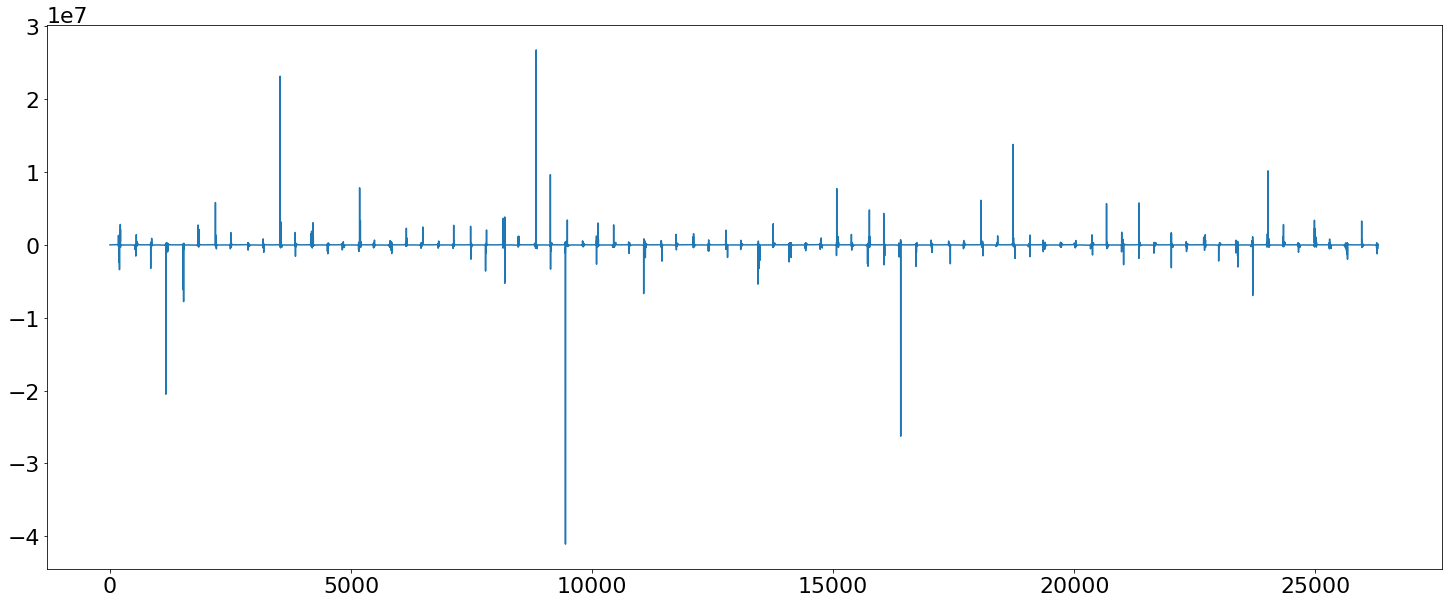

In [86]:
plt.figure(figsize = (25, 10))
plt.plot(1/(dists - np.mean(dists)))
#plt.plot((1/np.sin(dists-np**2)))

In [87]:
from sklearn.preprocessing import StandardScaler

In [140]:
scaler = StandardScaler()

In [141]:
n_dists = scaler.fit_transform(dists.reshape(-1,1))

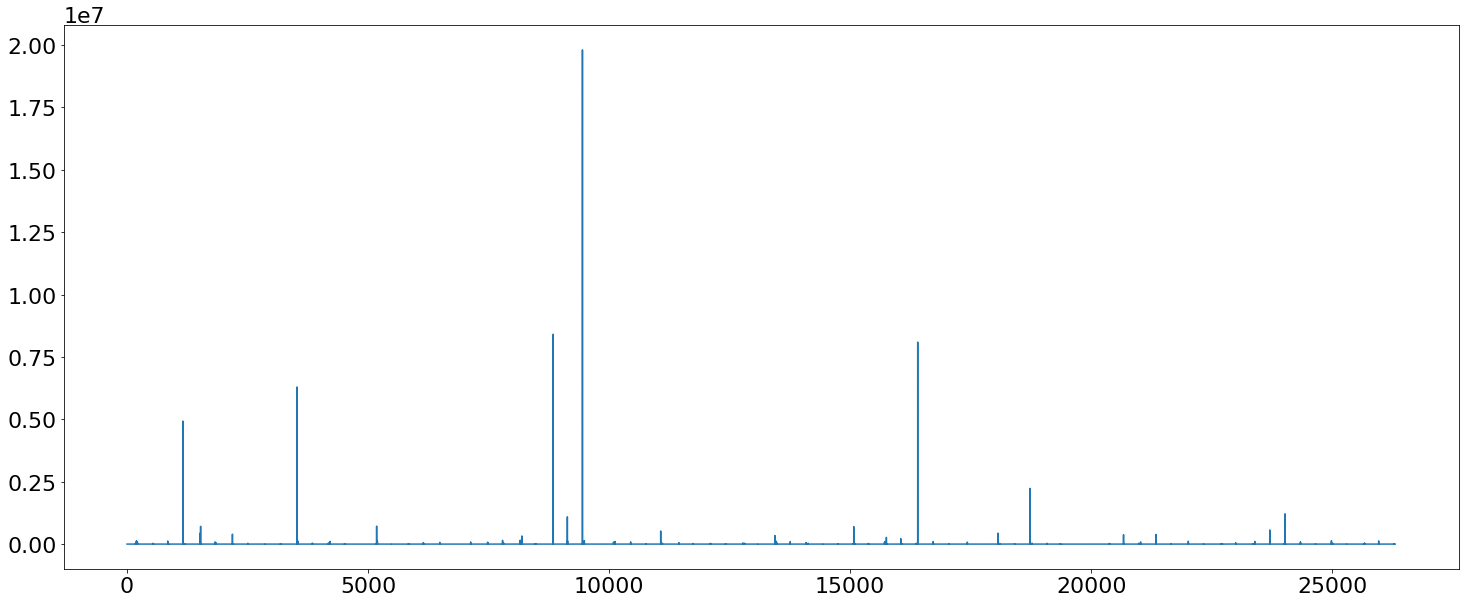

In [104]:
plt.figure(figsize = (25,10))
#plt.ylim(-100, 100)
plt.plot(1/n_dists**2)

In [108]:
from scipy.signal import periodogram

In [144]:
n_dists.ravel().shape

(26305,)

In [ ]:
np.diff

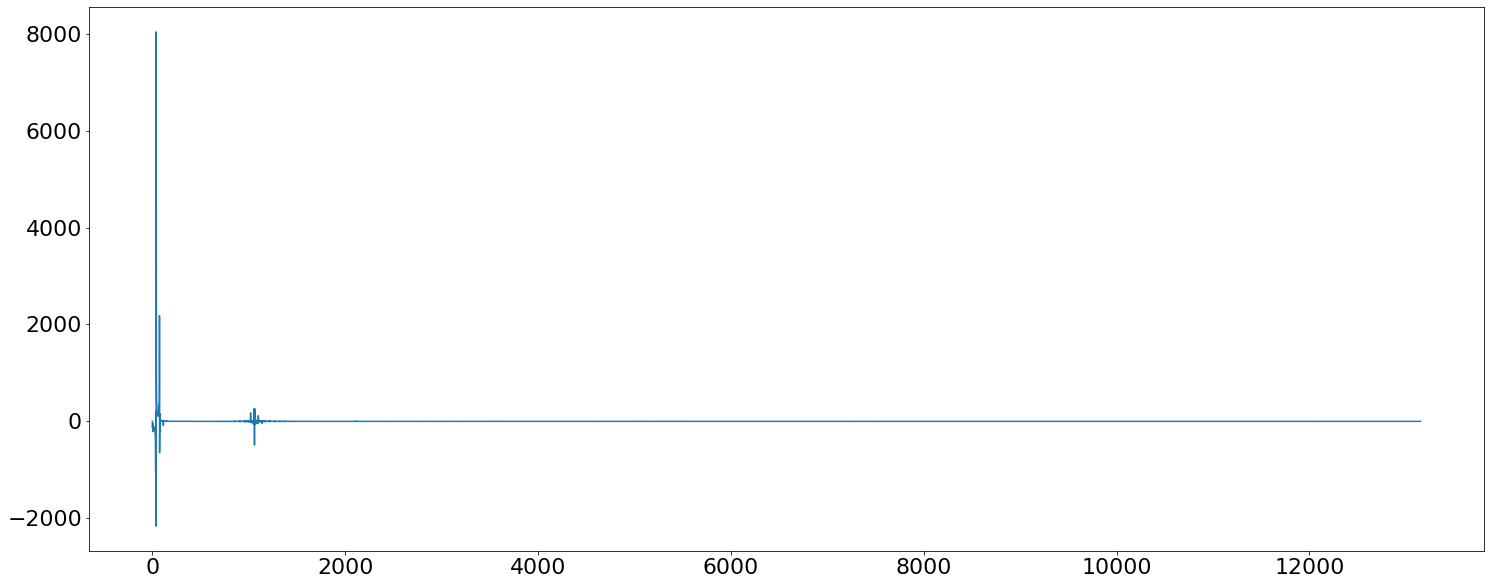

In [172]:
plt.figure(figsize = (25, 10))
#plt.xlim(0,1250)
plt.plot(np.fft.rfft(n_dists.ravel()))

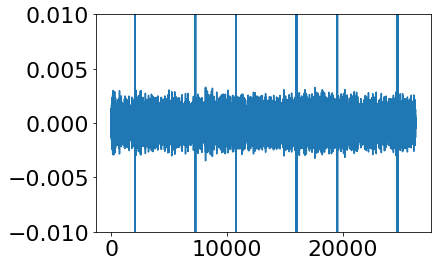

In [170]:
plt.ylim(-0.01,0.01)
plt.plot(np.diff(n_dists.ravel(), 12))

In [161]:
2*np.pi*1100/24

287.9793265790644

In [137]:
f, px = periodogram(dists)

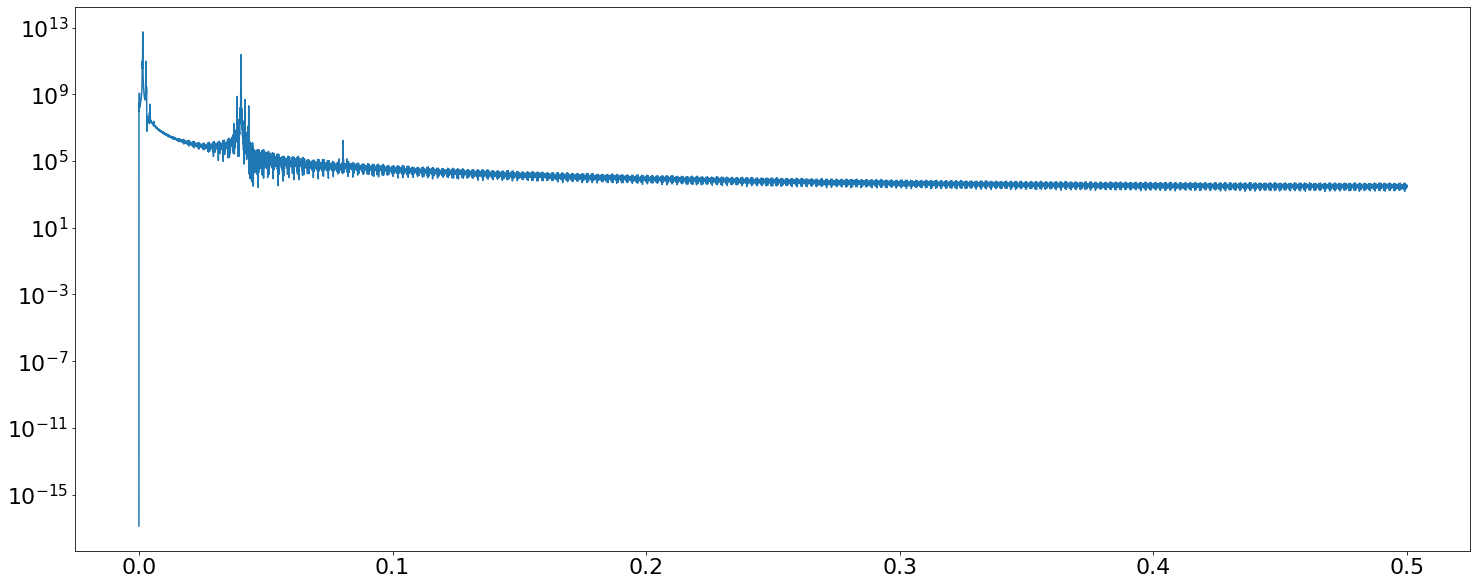

In [139]:
plt.figure(figsize = (25,10))
plt.semilogy(f, px)